In [1]:
import thinkdsp
import thinkplot
import matplotlib
import matplotlib.pyplot as plt

from scipy import signal
import numpy as np

## Korrelationsfunktionen
Die Korrelation zweier Funktionen ist ein Maß für ihre Ähnlichkeit und basiert auf der Faltung.
Wird eine Funktion mit sich selber korreliert, spricht man von Autokorrelation.
Die Autokorrelation zeigt die Ähnlichkeit der Funktion, bzw. des gesampelten Signals mit sich selbst.
Eine Sinusfunktion besitzt eine periodische Ähnlichkeit.
Das kann man recht einfach mit einer Sinuswelle bzw. zwei zueinander phasenverschobenen Sunuswellen zeigen. 

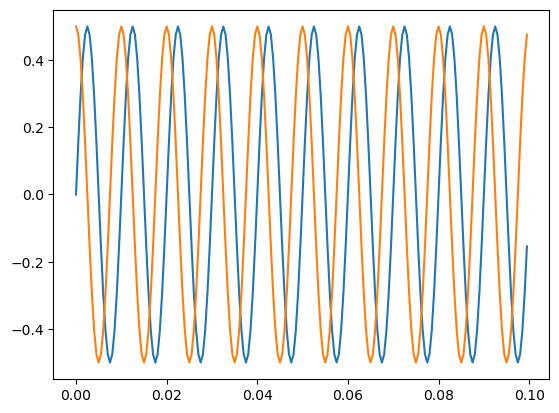

In [2]:
sin_sig = thinkdsp.SinSignal(freq=100.0, amp=0.5, offset=0)
sin_sig_shifted = thinkdsp.SinSignal(freq=100.0, amp=0.5, offset=np.pi/2)
sin_wave = sin_sig.make_wave(duration=0.1, framerate=2000)
sin_wave_shifted = sin_sig_shifted.make_wave(duration=0.1, framerate=2000)
sin_wave.plot()
sin_wave_shifted.plot()

Diese beiden Sinusfunktionen sind zueinander um Pi/2 phasenverschoben.
Zuerst führen wir eine Autokorrelation mit dem ersten Sinus durch.

In [3]:
corrs2 = np.correlate(sin_wave.ys, sin_wave.ys, mode='same')

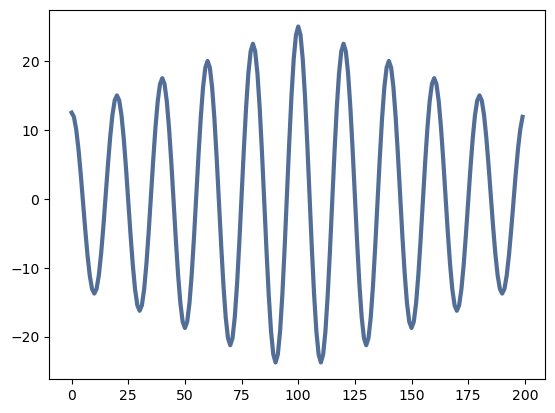

In [8]:
x_Achse = np.arange(0, len(sin_wave.ys))
thinkplot.plot(x_Achse,corrs2)

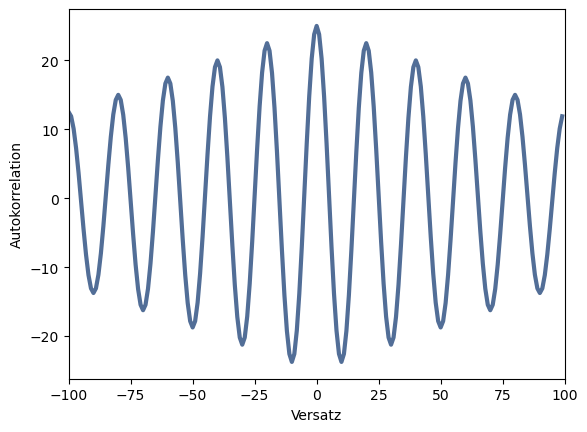

In [4]:
N = len(sin_wave) #Länge des Arrays
corrs2 = np.correlate(sin_wave.ys, sin_wave.ys, mode='same')
lags = np.arange(-N//2, N//2) # lags ist die Versetzung
thinkplot.plot(lags, corrs2)
thinkplot.config(xlabel='Versatz', ylabel='Autokorrelation', xlim=[-N//2, N//2])

Deutlich ist zu sehen, dass ein globales Maximum in der Mitte des Arrays entstanden ist, bei Versatz=0 (lag = 0).
Das heißt, auch der Sinus ist sich am ähnlichsten, wenn er nicht verschoben wird.
Jedoch fällt auf, dass es weitere lokale Maxima gibt, nämlich genau da, wo der Sinus wieder
dieselbe Phase hat wie das unverschobene Signal. Manchmal ist die Ähnlichkeit aber auch minimal!

### Kreuzkorrelation
Bei der Kreuzkorrelation werden zwei verschiedene Signale miteinander korreliert.
Hierzu benutzen wir die originale Sinuswelle und die phasenverschobene.

In [31]:
corrs2 = np.correlate(sin_wave.ys, sin_wave_shifted.ys, mode='same')

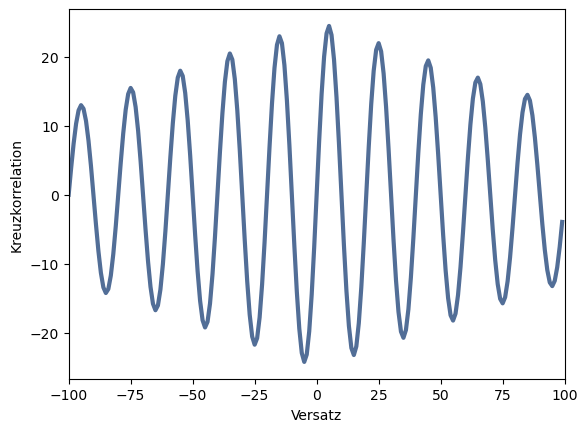

In [32]:
N = len(sin_wave) #Länge des Arrays
lags = np.arange(-N//2, N//2) # lags ist die Versetzung
thinkplot.plot(lags, corrs2)
thinkplot.config(xlabel='Versatz', ylabel='Kreuzkorrelation', xlim=[-N//2, N//2])

Deutlich ist die Verschiebung des Maximums zu sehen - die Sinuswellen sind sich jetzt erst nach einer bestimmten Verschiebung wieder ähnlich.
Mit der Autokorrelation lassen sich Signal auf ihre Periodizität bzw. auf periodische Inhalte prüfen.
So können stark verrauschte, periodische Signale validiert werden.
Als Beispiel generieren wir einen stark verrauschten Sinus.

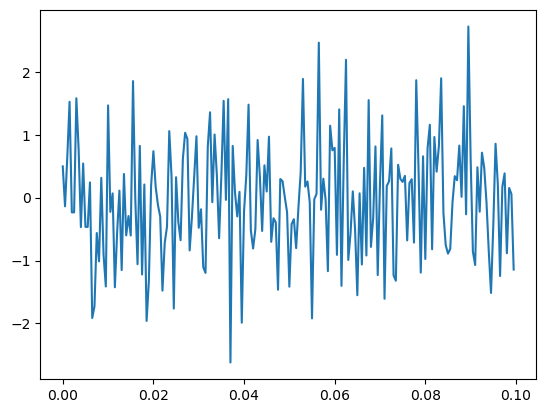

In [33]:
thinkdsp.random_seed(42)
noise_sig = thinkdsp.UncorrelatedGaussianNoise(amp=1.0)
noise_wave = noise_sig.make_wave(duration=0.1, framerate=2000)
noise_wave.plot()

Nun wird das Rauschen autokorreliert. Man erkennt nur ein Maximum in der Mitte, wo das Signal sich am ähnlichsten ist.

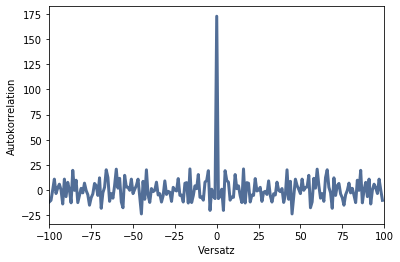

In [218]:
N = len(noise_wave)
corrs_noise = np.correlate(noise_wave.ys, noise_wave.ys, mode='same')
lags = np.arange(-N//2, N//2)
thinkplot.plot(lags, corrs_noise)
thinkplot.config(xlabel='Versatz', ylabel='Autokorrelation', xlim=[-N//2, N//2])

Wir erzeugen durch Addition von Sinuswelle und Rauschen einen verrauschten Sinus.
Dieser wird anschließend ebenfalls autokorreliert.

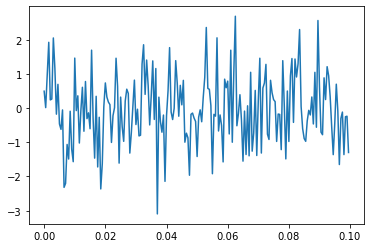

In [219]:
noisy_sine = sin_wave + noise_wave
noisy_sine.plot()

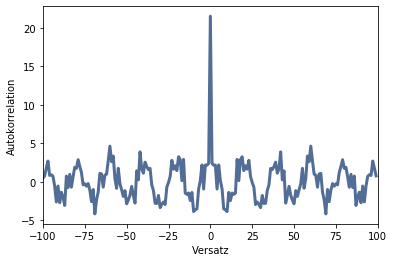

In [220]:
noisy_sine.normalize()
N = len(noisy_sine)
sine_noise = np.correlate(noisy_sine.ys, noisy_sine.ys, mode='same')
lags = np.arange(-N//2, N//2)
thinkplot.plot(lags, sine_noise)
thinkplot.config(xlabel='Versatz', ylabel='Autokorrelation', xlim=[-N//2, N//2])

Auch hier ist sich das Signal am ähnlichsten bei einem Versatz (lag) von 0.
Jedoch sieht man deutlich, dass eine periodische Funktion vorhanden sein muss,
da sich Teile der Funktion nach einer bestimmten Sampleanzahl wiederholen.
Das ist dem Signal im Zeitbereich sehr schwer oder gar nicht anzusehen.